In [117]:
#importando os pacotes
import pandas as pd
import matplotlib.pyplot as plt
import colorsys
plt.style.use('seaborn-deep')
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [118]:
dados = pd.read_csv('dataset.csv')

In [119]:
dados.shape

(127380, 136)

In [120]:
dados.describe()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,...,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
count,1.273800e+05,127380.0,1.273800e+05,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,1.237570e+05,123757.000000,...,92758.000000,127380.000000,98043.000000,98043.000000,98043.000000,98043.000000,98043.000000,98043.000000,98043.000000,127380.000000
mean,1.900035e+11,2019.0,3.086067e+06,30.709389,22.094355,1.076841,2.131198,1.029345,3.058310e+06,30.431103,...,523.555206,0.524486,1.136155,120.554859,122.912396,114.901013,121.682323,91.519435,571.570025,3.864068
std,1.469535e+06,0.0,9.961399e+05,9.931060,7.498707,0.440671,1.017373,0.202790,9.827584e+05,9.793934,...,109.416939,0.499402,0.777411,33.250346,42.786693,40.030347,37.953250,59.380566,188.076455,1.475714
min,1.900010e+11,2019.0,1.100015e+06,11.000000,13.000000,0.000000,0.000000,0.000000,1.100015e+06,11.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.900023e+11,2019.0,2.405776e+06,24.000000,18.000000,1.000000,1.000000,1.000000,2.313955e+06,23.000000,...,435.300000,0.000000,1.000000,120.000000,120.000000,100.000000,100.000000,40.000000,480.000000,3.000000
50%,1.900035e+11,2019.0,3.123779e+06,31.000000,19.000000,1.000000,2.000000,1.000000,3.109402e+06,31.000000,...,501.600000,1.000000,1.000000,120.000000,120.000000,120.000000,120.000000,100.000000,580.000000,4.000000
75%,1.900048e+11,2019.0,3.549904e+06,35.000000,24.000000,1.000000,3.000000,1.000000,3.548708e+06,35.000000,...,598.200000,1.000000,1.000000,140.000000,140.000000,140.000000,140.000000,140.000000,680.000000,5.000000
max,1.900061e+11,2019.0,5.300108e+06,53.000000,82.000000,4.000000,5.000000,4.000000,5.300108e+06,53.000000,...,985.000000,1.000000,9.000000,200.000000,200.000000,200.000000,200.000000,200.000000,1000.000000,20.000000


## Desafio 1: Proporção dos inscritos por idade

In [121]:
total = len(dados.NU_INSCRICAO.value_counts())

dados.NU_IDADE.value_counts().sort_index()/total*100


13     0.003140
14     0.110692
15     1.577171
16     6.146962
17    16.687078
        ...    
73     0.001570
75     0.001570
76     0.000785
77     0.000785
82     0.000785
Name: NU_IDADE, Length: 65, dtype: float64

## Desafio 2: Descobrir de quais estados são os inscritos com 13 anos

In [122]:
inscritos = dados.query('NU_IDADE == 13')
inscritos['SG_UF_RESIDENCIA'].value_counts()

SP    1
AP    1
MT    1
BA    1
Name: SG_UF_RESIDENCIA, dtype: int64

## Desafio 3: Adicionar título no gráfico

Text(0.5, 1.0, 'Distribuição de inscritos por idade')

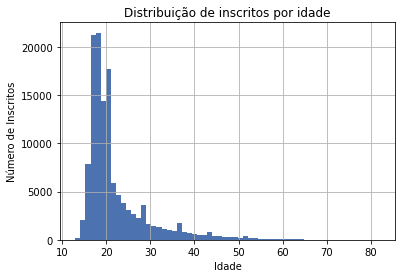

In [123]:
dados['NU_IDADE'].hist(bins = 60)
plt.xlabel('Idade')
plt.ylabel('Número de Inscritos')
plt.title("Distribuição de inscritos por idade")


## Desafio 4: Plotar os histogramas das idades dos treineiros e não treineiros

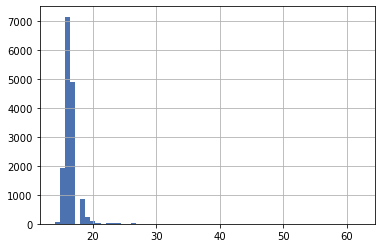

In [124]:
treineiros = dados.query('IN_TREINEIRO == 1')
treineiros['NU_IDADE'].hist(bins = 60)


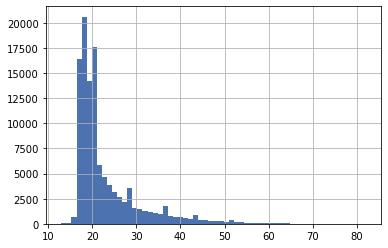

In [125]:
n_treineiros = dados.query('IN_TREINEIRO == 0')

n_treineiros['NU_IDADE'].hist(bins = 60)

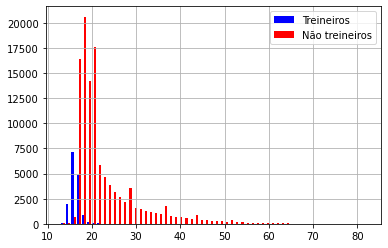

In [126]:
l=['Treineiros', 'Não treineiros']
c=['blue','red']
plt.hist([treineiros['NU_IDADE'],n_treineiros['NU_IDADE']], bins = 60,  label = l, color = c)
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


## Desafio 5: Comparar as distribuições das provas em inglês e espanhol

Text(0.5, 1.0, 'Espanhol')

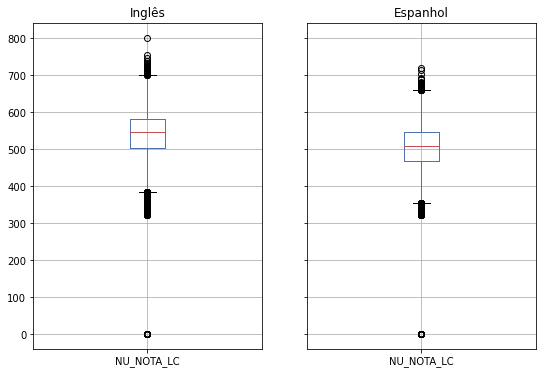

In [127]:
ingles = dados.query('TP_LINGUA == 0')
espanhol = dados.query('TP_LINGUA == 1')

fig, (ax1, ax2) = plt.subplots(1, 2, sharey = (True), figsize=(9,6))
ingles['NU_NOTA_LC'].plot.box(ax = ax1, grid=(True))
espanhol['NU_NOTA_LC'].plot.box(ax = ax2, grid=(True))
ax1.set_title('Inglês')
ax2.set_title('Espanhol')
